In [33]:
import sqlutil as sqlutil 
import matplotlib.pyplot as plt
import numpy as np

#plotting the motion of one lens.
lensRa, lensDec, id,pmra,pmdec = sqlutil.get('select ra, dec, source_id,pmra,pmdec from gaia_dr1.tgas_source where pmra > 1500',
                       db='wsdb',host='cappc127.ast.cam.ac.uk', user='peter_mcgill', password='Ln3g.wsk')

#backgroud catalogue
sourceRa, sourceDec = sqlutil.get('select ra, dec from ppmxl.main limit 1000000',
                       db='wsdb',host='cappc127.ast.cam.ac.uk', user='peter_mcgill', password='Ln3g.wsk')

In [42]:
xvalues = []
yvalues = []

ra = lensRa[0]
dec = lensDec[0]

for i in np.linspace(0,1000000.0,num=10):
    ra_new = ra + i*pmra[0]*0.000277778*10**(-6)
    print(i*pmra[0]*0.000277778*10**(-6))
    dec_new = dec + i*pmdec[0]*0.00027778*10**(-6) 
    xvalues.append(dec_new * np.cos(np.deg2rad(ra_new)))
    yvalues.append(ra_new)
    


0.0
0.0483628302182
0.0967256604364
0.145088490655
0.193451320873
0.241814151091
0.290176981309
0.338539811528
0.386902641746
0.435265471964


In [39]:
lensRa

array([  12.88674411,   16.79883142,   15.65746829,    4.61210931,
        176.4549073 ,   32.62201119])

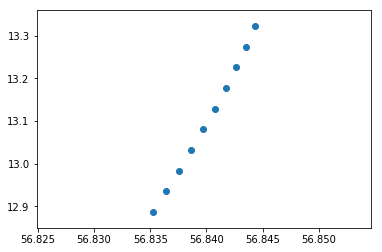

In [43]:
plt.scatter(xvalues,yvalues)
#plt.scatter(sourceDec*np.cos(sourceRa),sourceRa)
plt.show()


In [ ]:
np.linspace(0,1.0,num=1)

In [25]:
2**(-2)

0.25